<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Average age: 39.2 years
BMI Range: 15.96 to 53.13 (Average: 30.66)
Percentage of Smokers: 20.5%
Charges Range: $1,122 to $63,770 (Average: $13,279)


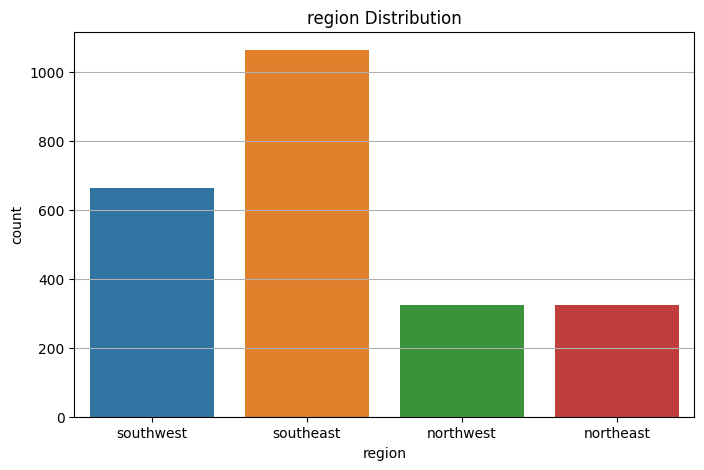

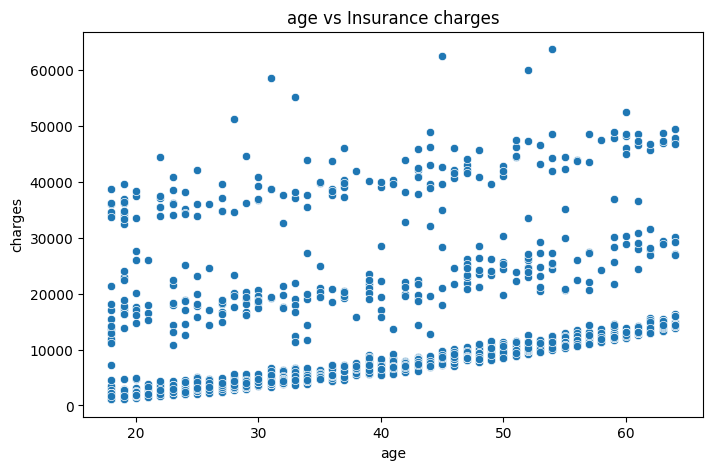

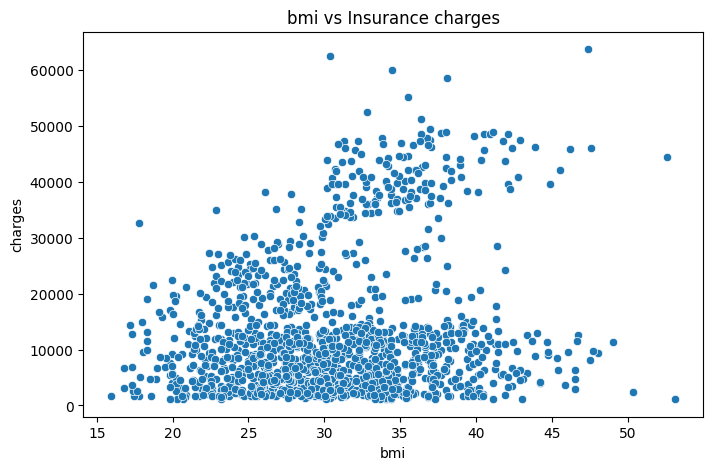

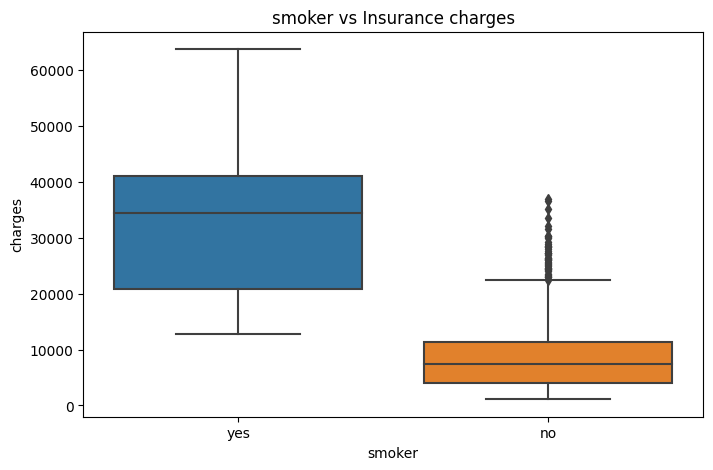

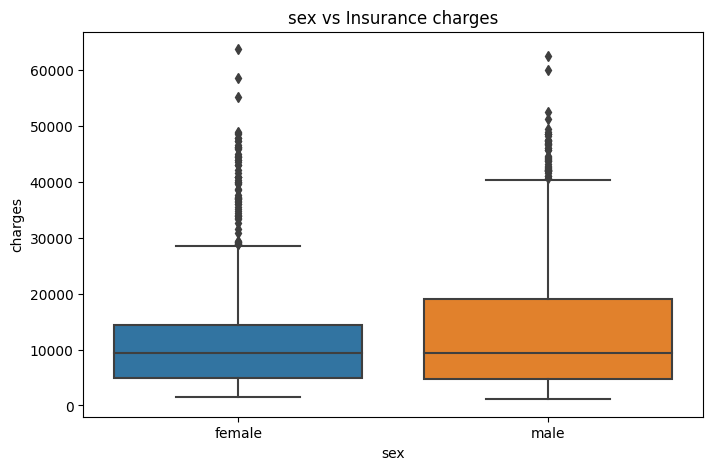

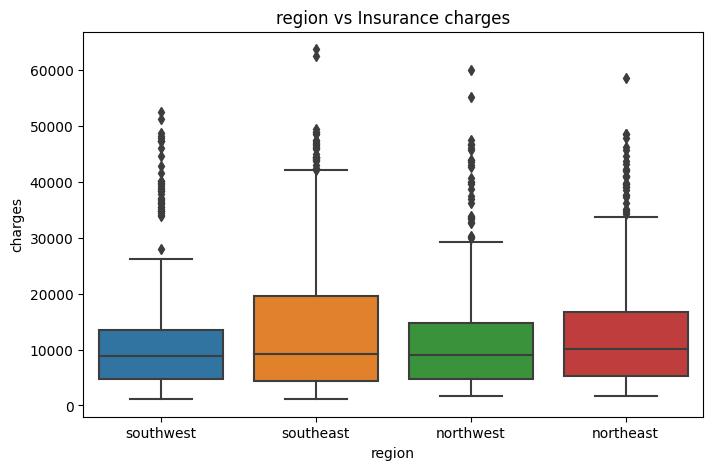

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


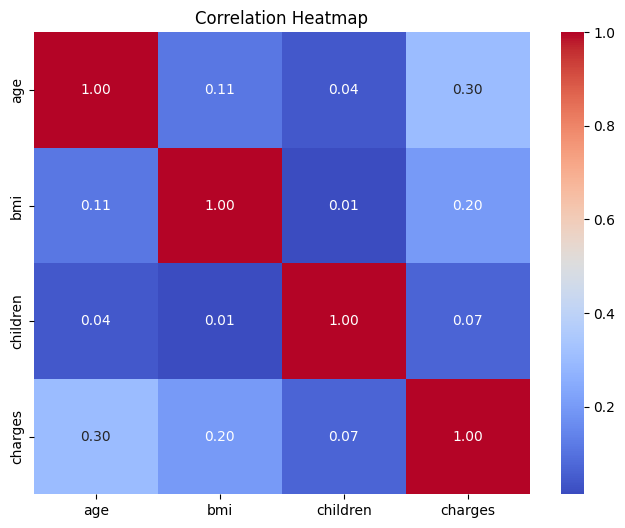

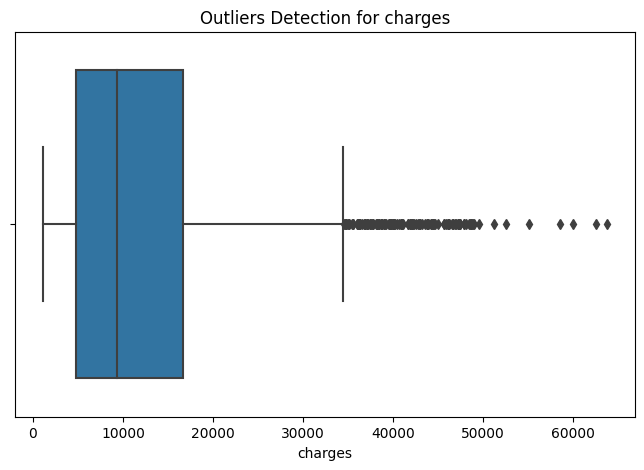

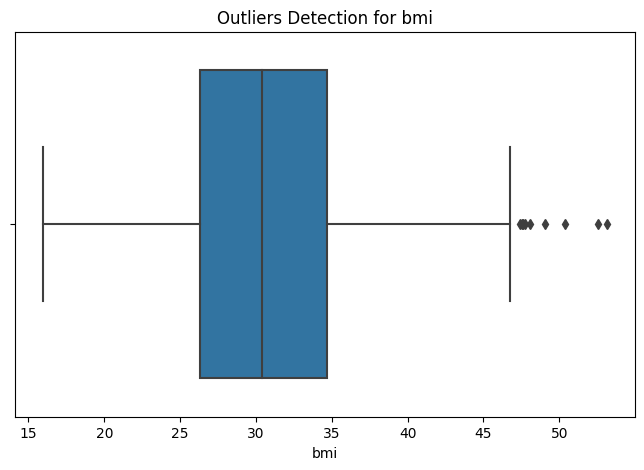

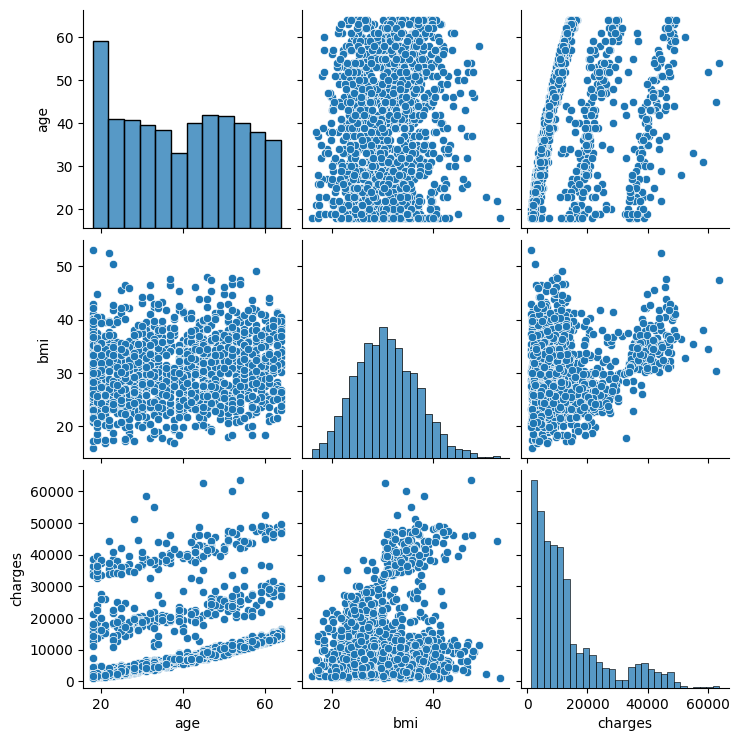

In [1]:
# EXPLORATORY DATA ANALYSIS OF US HEALTH INSURANCE DATASET

## Introduction
# This notebook explores the US Health Insurance dataset to uncover patterns and relationships between features and the target variable (`charges`). The key objectives include:
# - Understanding the dataset's structure and distribution.
# - Identifying relationships between features and their influence on `charges`.
# - Highlighting insights to guide further statistical analysis and modeling.




!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

import kagglehub

#$ Download latest version
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")

# print("Path to dataset files:", path)

import pandas as pd
#$ Replace with the exact path to your dataset file

file_path = '../input/ushealthinsurancedataset/insurance.csv'

# $Load the dataset
df = pd.read_csv(file_path)

# Data Preparation

# $Check the first few rows of the dataset
df.head()
#$ Check dataset info
df.info()

#$ Get a statistical summary of numerical columns
df.describe()

#$ Check for missing values
df.isnull().sum()

#$ Check for duplicate rows
df.duplicated().sum()

#$ Remove duplicates if necessary
df = df.drop_duplicates()

## Dataset Overview
# - Number of rows: 1338
# - Number of columns: 7
# -one duplicated values was detected.

# Descriptive Analysis

print(f"Average age: {df['age'].mean():.1f} years")
print(f"BMI Range: {df['bmi'].min()} to {df['bmi'].max()} (Average: {df['bmi'].mean():.2f})")
print(f"Percentage of Smokers: {df['smoker'].value_counts(normalize=True)['yes'] * 100:.1f}%")
print(f"Charges Range: ${df['charges'].min():,.0f} to ${df['charges'].max():,.0f} (Average: ${df['charges'].mean():,.0f})")
# - The average age of insured individuals is 39 years.
# - BMI values range from 15.96 to 53.13, with an average of 30.66.
# - Smokers constitute 20.5% of the dataset.
# - Charges range from $1,122 to $63,770, with an average of $13,270.


import matplotlib.pyplot as plt
import seaborn as sns

####Single Feature Exploration

#$$CONTINUOUS VARIABLES

#$ Histogram for 'age'
df['age'].hist(bins=20, figsize=(8, 5))
plt.title("age Distribution")
# plt.show()

#$ Histogram for 'bmi'
df['bmi'].hist(bins=20, figsize=(8, 5))
plt.title("bmi Distribution")
# plt.show()

#$ Histogram for 'Charges' (Insurance charges)
df['charges'].hist(bins=20, figsize=(8, 5))
plt.title("Insurance charges Distribution")
# plt.show()


#$$ CATEGORIAL VARIABLES
# Bar plot for 'sex' distribution
sns.countplot(x='sex', data=df)
plt.title("sex Distribution")
# plt.show()

# Bar plot for 'smoker' distribution
sns.countplot(x='smoker', data=df)
plt.title("smoker Distribution")
# plt.show()

# Bar plot for 'region' distribution
sns.countplot(x='region', data=df)
plt.title("region Distribution")
# plt.show()


### Exploring Relationships Between Features

#$ Continuous vs Continuous Variables (e.g., Age vs Charges, BMI vs Charges)

# Scatter plot for age vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title("age vs Insurance charges")
plt.show()
# *Observation*: Insurance charges tend to increase with age.

# Scatter plot for bmi vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("bmi vs Insurance charges")
plt.show()
# *Observation*: Higher BMI values are associated
#  with slightly higher insurance charges, but the trend is not as strong as age.
# While there is a slight upward trend in BMI vs Charges, the relationship is less clear compared to Age vs Charges.

#$ Categorical vs Continuous Variables (e.g., Smoker vs Charges, Sex vs Charges)

# Box plot for charges vs smoker
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("smoker vs Insurance charges")
plt.show()
# *Observation*: Smokers have significantly higher charges compared to non-smokers.
# The higher charges for smokers indicate the potential for targeted insurance pricing or health interventions.

# Box plot for charges vs sex
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("sex vs Insurance charges")
plt.show()

# Box plot for charges vs region
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', data=df)
plt.title("region vs Insurance charges")
plt.show()
# *Observation*: Charges are fairly consistent across regions with no significant variations.

#$ Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

#$ Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
# plt.show()

### Outlier Detection
#$ Boxplot to detect outliers for 'charges'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['charges'])
plt.title("Outliers Detection for charges")
# plt.show()
# *Observation*: Outliers were detected in `Charges`, representing extreme healthcare costs.
# Outliers in charges may represent individuals with chronic illnesses or high-risk profiles.

#$ Boxplot for 'bmi'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title("Outliers Detection for bmi")
# plt.show()


### Categorical Data Analysis
#$ Pivot table to show average charges based on smoker
smoker_charges = df.pivot_table(values='charges', columns='smoker', aggfunc='mean')
# print(smoker_charges)

#$ Pivot table to show average Charges based on sex
sex_charges = df.pivot_table(values='charges', columns='sex', aggfunc='mean')
# print(sex_charges)

#$ Pairplot for selected features (age, bmi, charges)
sns.pairplot(df[['age', 'bmi', 'charges']])
# plt.show()



## Insights
# - Smokers have significantly higher charges compared to non-smokers.
# - BMI and Age are positively correlated with insurance charges.
# - Gender has minimal impact on charges, while regional differences are also minor.
# - Outliers were detected in `Charges`, likely due to extreme healthcare costs for a subset of individuals.


## Conclusion
#The analysis revealed that smoking is a major determinant of higher charges, followed by age and BMI. Gender and region have minimal influence. Outliers in charges suggest high-risk or costly healthcare cases.
